In [5]:
# client_parkinson_knn.py
import flwr as fl
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

# -----------------------------
# CLIENT CONFIG
# -----------------------------
client_name = "Parkinson"
dataset_path = r"D:\DAML\ML\datasets neuro\Parkinsson disease.csv"
target_column = "status"
server_address = "10.244.107.149:5555"  # ZeroTier IP + port

# -----------------------------
# LOAD DATA
# -----------------------------
df = pd.read_csv(dataset_path)

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# PREPROCESSING
# -----------------------------
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=["int64", "float64"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train).toarray()
X_test_processed = preprocessor.transform(X_test).toarray()

# -----------------------------
# CREATE KNN MODEL
# -----------------------------
model = KNeighborsClassifier(n_neighbors=5)

# -----------------------------
# FLOWER CLIENT
# -----------------------------
class ParkinsonClient(fl.client.NumPyClient):
    def __init__(self):
        self.model = model
        self.X_train = X_train_processed
        self.y_train = np.array(y_train)
        self.X_test = X_test_processed
        self.y_test = np.array(y_test)

    def get_parameters(self, config):
        # KNN does not have weights to aggregate
        return []

    def fit(self, parameters, config):
        # Train locally
        self.model.fit(self.X_train, self.y_train)
        # Return empty weights, num_examples, metrics
        return [], self.X_train.shape[0], {"accuracy": self.model.score(self.X_train, self.y_train), "client_name": client_name}

    def evaluate(self, parameters, config):
        # Evaluate locally
        accuracy = self.model.score(self.X_test, self.y_test)
        return 0.0, self.X_test.shape[0], {"accuracy": accuracy, "client_name": client_name}

# -----------------------------
# START CLIENT
# -----------------------------
fl.client.start_client(
    server_address=server_address,
    client=ParkinsonClient().to_client()
)


	Instead, use the `flower-supernode` CLI command to start a SuperNode as shown below:

		$ flower-supernode --insecure --superlink='<IP>:<PORT>'

	To view all available options, run:

		$ flower-supernode --help

	Using `start_client()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      
INFO :      Received: get_parameters message 1f9f4ff5-7a6f-4819-9133-c4ba5aba8706
INFO :      Sent reply
INFO :      
INFO :      Received: train message 048f1cc8-200d-445f-ba56-ea3d96d5dfab
INFO :      Sent reply


_MultiThreadedRendezvous: <_MultiThreadedRendezvous of RPC that terminated with:
	status = StatusCode.UNAVAILABLE
	details = "IOCP/Socket: Connection reset (An existing connection was forcibly closed by the remote host.
 -- 10054)"
	debug_error_string = "UNKNOWN:Error received from peer ipv4:10.244.107.149:5555 {grpc_status:14, grpc_message:"IOCP/Socket: Connection reset (An existing connection was forcibly closed by the remote host.\r\n -- 10054)"}"
>

[I 2025-10-30 11:13:10,946] A new study created in memory with name: logistic_regression_parkinsons


Starting Optuna optimization...


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-10-30 11:13:19,592] Trial 0 finished with value: 0.7564516129032258 and parameters: {'penalty': 'l2', 'C': 0.0008632008168602544, 'solver': 'lbfgs', 'max_iter': 737, 'class_weight': None}. Best is trial 0 with value: 0.7564516129032258.
[I 2025-10-30 11:13:19,697] Trial 1 finished with value: 0.2435483870967742 and parameters: {'penalty': 'l1', 'C': 0.006690421166498805, 'solver': 'newton-cg', 'max_iter': 225, 'class_weight': None}. Best is trial 0 with value: 0.7564516129032258.
[I 2025-10-30 11:13:19,842] Trial 2 finished with value: 0.794758064516129 and parameters: {'penalty': 'l2', 'C': 0.35849855803404745, 'solver': 'saga', 'max_iter': 954, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.794758064516129.
[I 2025-10-30 11:13:19,902] Trial 3 finished with value: 0.7564516129032258 and parameters: {'penalty': 'elasticnet', 'C': 0.0005397956855996448, 'solver': 'lbfgs', 'max_iter': 696, 'class_weight': None, 'l1_ratio': 0.5467102793432796}. Best is trial 2 with val

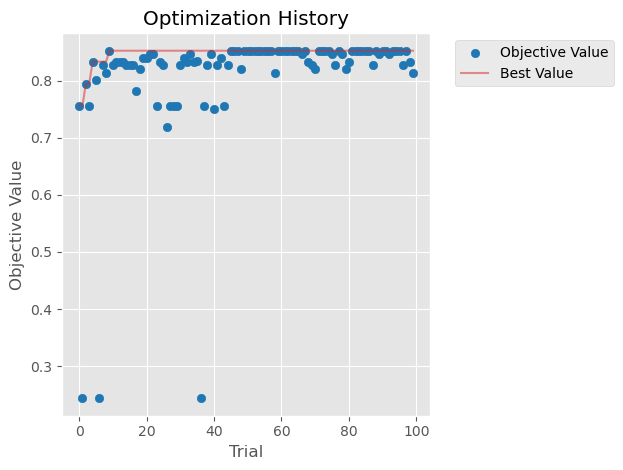


Visualization error: bad allocation

Model saved as 'best_logistic_regression_model.pkl'
Scaler saved as 'scaler.pkl'
Error in callback <function _draw_all_if_interactive at 0x000002491AB15F80> (for post_execute), with arguments args (),kwargs {}:
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py", line 82, in trigger
    func(*args, **kwargs)
  File "C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\pyplot.py", line 279, in _draw_all_if_interactive
    draw_all()
  File "C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\_pylab_helpers.py", line 131, in draw_all
    manager.canvas.draw_idle()
  File "C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\backend_bases.py", line 1893, in draw_idle
    self.draw(*args, **kwargs)
  File "C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\backends\backend_agg.py", line 377, in draw
    self.renderer = self.get_renderer()
                    ^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\backends\backend_agg.py", line 392, in get_renderer
    self.renderer = RendererAgg(w, h, self.figure.dpi)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Li

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\formatters.py", line 282, in catch_format_error
    r = method(self, *args, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\formatters.py", line 402, in __call__
    return printer(obj)
           ^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py", line 170, in print_figure
    fig.canvas.print_figure(bytes_io, **kw)
  File "C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\backend_bases.py", line 2149, in print_figure
    renderer = _get_renderer(
               ^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\backend_bases.py", line 1574, in _get_renderer
    print_method(io.BytesIO())
  File "C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\backend_bases.py", line 2042, in <lambda>
    print_method = functools.wraps(meth)(lambda *args, **kwargs: 

<Figure size 640x480 with 1 Axes>

In [1]:
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# ============================================================
# LOAD YOUR PARKINSON'S DATASET HERE
# ============================================================
# PUT YOUR FILE PATH BELOW (replace 'your_file.csv' with actual path)

df = pd.read_csv(r"D:\ML\Neurodivergent\Parkinsson disease.csv")  # <--- PUT YOUR FILE PATH HERE

# Adjust column names based on your dataset
X = df.drop(['name', 'status'], axis=1)  # Remove non-feature columns and target
y = df['status']  # Target variable (0 = healthy, 1 = parkinson's)

# ============================================================
# If using sample data for testing, uncomment lines below:
# ============================================================
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=195, n_features=22, n_informative=15, 
#                            n_redundant=5, random_state=42, n_classes=2)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
    """
    Optuna objective function for Logistic Regression hyperparameter tuning
    """
    
    # Suggest hyperparameters
    params = {
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', None]),
        'C': trial.suggest_float('C', 1e-4, 100, log=True),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'saga', 'lbfgs', 'newton-cg']),
        'max_iter': trial.suggest_int('max_iter', 100, 1000),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None]),
        'random_state': 42
    }
    
    # Handle solver and penalty compatibility
    if params['penalty'] == 'l1':
        if params['solver'] not in ['liblinear', 'saga']:
            params['solver'] = 'liblinear'
    elif params['penalty'] == 'elasticnet':
        params['solver'] = 'saga'
        params['l1_ratio'] = trial.suggest_float('l1_ratio', 0.0, 1.0)
    elif params['penalty'] is None:
        if params['solver'] == 'liblinear':
            params['solver'] = 'lbfgs'
    
    # Create model
    model = LogisticRegression(**params)
    
    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(
        model, X_train_scaled, y_train, 
        cv=cv, scoring='accuracy', n_jobs=-1
    )
    
    return scores.mean()

# Create Optuna study
study = optuna.create_study(
    direction='maximize',
    study_name='logistic_regression_parkinsons',
    sampler=optuna.samplers.TPESampler(seed=42)
)

# Optimize
print("Starting Optuna optimization...")
study.optimize(objective, n_trials=100, show_progress_bar=True)

# Print results
print("\n" + "="*60)
print("OPTIMIZATION RESULTS")
print("="*60)
print(f"\nBest trial: {study.best_trial.number}")
print(f"Best accuracy: {study.best_value:.4f}")
print("\nBest hyperparameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

# Train final model with best parameters
print("\n" + "="*60)
print("TRAINING FINAL MODEL")
print("="*60)

best_params = study.best_params.copy()
best_params['random_state'] = 42

# Handle elasticnet case
if best_params.get('penalty') == 'elasticnet':
    if 'l1_ratio' not in best_params:
        best_params['l1_ratio'] = 0.5

final_model = LogisticRegression(**best_params)
final_model.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred = final_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Set Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot optimization history
try:
    import matplotlib.pyplot as plt
    
    # Optimization history
    fig1 = optuna.visualization.matplotlib.plot_optimization_history(study)
    plt.title('Optimization History')
    plt.tight_layout()
    plt.savefig('optimization_history.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Parameter importances
    fig2 = optuna.visualization.matplotlib.plot_param_importances(study)
    plt.title('Hyperparameter Importances')
    plt.tight_layout()
    plt.savefig('param_importances.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nVisualizations saved as 'optimization_history.png' and 'param_importances.png'")
    
except ImportError:
    print("\nInstall matplotlib for visualizations: pip install matplotlib")
except Exception as e:
    print(f"\nVisualization error: {e}")

# Save the best model
import joblib
joblib.dump(final_model, 'best_logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\nModel saved as 'best_logistic_regression_model.pkl'")
print("Scaler saved as 'scaler.pkl'")